# Pima Indians Diabetes Database

## Train/Test Split

In [44]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, f1_score
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn import model_selection

In [24]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pd.read_csv(url, names=names)
array = dataframe.values

dataframe.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [25]:
def split_dataframe(dataframe):
    """
    Split the dataset into training & test sets using a 70/30 split.
    I expect the input dataset to have the class label as the first column
    and the feature values as the remaining columns.
    """

    X = array[:,0:8]
    Y = array[:,8]

    X_train, X_test, y_train, y_test = train_test_split(
        X, Y, test_size=0.3, random_state=100)

    # Print the shapes of the resulting train and test sets
    print(f"Training features shape: {X_train.shape}, labels shape: {y_train.shape}")
    print(f"Test features shape: {X_test.shape}, labels shape: {y_test.shape}")

    return X, Y, X_train, X_test, y_train, y_test

In [26]:
# Split the dataset into training and test sets
X, Y, X_train, X_test, y_train, y_test = split_dataframe(dataframe)

Training features shape: (537, 8), labels shape: (537,)
Test features shape: (231, 8), labels shape: (231,)


## K-Fold Cross Validation

Cross-validated scores: [0.25246861 0.29965553 0.2195045  0.21024473 0.40474136 0.29847004]
Cross-Predicted Accuracy: 0.2851287142303135


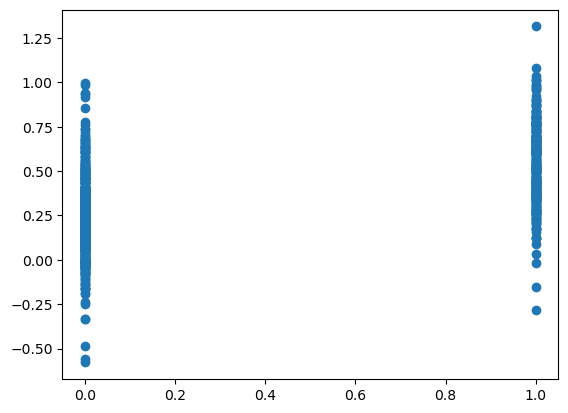

In [27]:
# fit a model
model = linear_model.LinearRegression()

# Perform 6-fold cross validation
scores = cross_val_score(model, X, Y, cv=6)
print("Cross-validated scores:", scores)

# Make cross validated predictions
predictions = cross_val_predict(model, X, Y, cv=6)
plt.scatter(Y, predictions)

accuracy = metrics.r2_score(Y, predictions)
print("Cross-Predicted Accuracy:", accuracy)

## Decision Tree Classifier

In [28]:
# Function to train a decision tree classifier using the Gini Index
def train_decision_tree_gini(X_train, X_test, y_train): 
    # Create the decision tree classifier object with Gini Index as criterion
    clf_gini = DecisionTreeClassifier(criterion="gini", 
                                       random_state=100,
                                       max_depth=3,
                                       min_samples_leaf=5) 
  
    # Train the classifier on the training data
    clf_gini.fit(X_train, y_train) 
    return clf_gini

In [29]:
# Function to train decision tree using entropy criterion
def train_using_entropy(X_train, X_test, y_train):
    """
    Trains a decision tree classifier using entropy as the split criterion
    
    Args:
    - X_train (array-like, shape = [n_samples, n_features]): Training input samples
    - X_test (array-like, shape = [n_samples, n_features]): Test input samples
    - y_train (array-like, shape = [n_samples]): Target values for the training set
    
    Returns:
    - clf_entropy (DecisionTreeClassifier): Fitted decision tree classifier using entropy as the split criterion
    """
  
    # Create decision tree classifier object
    clf_entropy = DecisionTreeClassifier( 
            criterion = "entropy", 
            random_state = 100, 
            max_depth = 3, 
            min_samples_leaf = 5) 
  
    # Fit decision tree classifier to training data
    clf_entropy.fit(X_train, y_train) 
    
    # Return the trained classifier
    return clf_entropy

In [30]:
# Function to make predictions using a trained classifier
def make_predictions(X_test, clf): 

    # Predictions using the classifier 
    y_pred = clf.predict(X_test) 
    # Print the predicted values (optional)
    # print("Predicted values:") 
    # print(y_pred) 
    return y_pred

In [31]:
def calculate_accuracy(y_true, y_pred): 
    """
    Calculates and prints the accuracy, confusion matrix and classification report 
    for a set of true labels and predicted labels.
    
    Parameters:
    y_true (array-like): The true labels of the data.
    y_pred (array-like): The predicted labels for the data.
    """
    # Compute the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:\n", cm)

    # Compute the accuracy score
    acc = accuracy_score(y_true, y_pred)
    print("Accuracy: {:.2f}%".format(acc*100))

    # Compute and print the classification report
    report = classification_report(y_true, y_pred)
    print("Classification Report:\n", report)

In [32]:
# Building Phase 
clf_gini = train_decision_tree_gini(X_train, X_test, y_train) 
clf_entropy = train_using_entropy(X_train, X_test, y_train) 

In [33]:
import warnings
warnings.filterwarnings("ignore")

# Make predictions using the gini model
y_pred_gini = make_predictions(X_test, clf_gini)

# Calculate accuracy of the gini model
calculate_accuracy(y_test, y_pred_gini)

Confusion Matrix:
 [[140  10]
 [ 54  27]]
Accuracy: 72.29%
Classification Report:
               precision    recall  f1-score   support

         0.0       0.72      0.93      0.81       150
         1.0       0.73      0.33      0.46        81

    accuracy                           0.72       231
   macro avg       0.73      0.63      0.64       231
weighted avg       0.72      0.72      0.69       231



In [34]:
# Predict using the entropy classifier
y_pred_entropy = make_predictions(X_test, clf_entropy) 

# Calculate and print the accuracy of the entropy classifier
calculate_accuracy(y_test, y_pred_entropy)

Confusion Matrix:
 [[140  10]
 [ 54  27]]
Accuracy: 72.29%
Classification Report:
               precision    recall  f1-score   support

         0.0       0.72      0.93      0.81       150
         1.0       0.73      0.33      0.46        81

    accuracy                           0.72       231
   macro avg       0.73      0.63      0.64       231
weighted avg       0.72      0.72      0.69       231



## Random Forest

In [35]:
# Set the seed for reproducibility
random_seed = 7

# Define the number of trees to use in the random forest
num_trees = 100

# Define the maximum number of features to consider when splitting each tree
max_features = 3

# Define the number of folds for cross-validation
kfold_cv = KFold(n_splits=10)

# Create a random forest classifier with the specified number of trees and maximum number of features
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features, random_state=random_seed)

# Evaluate the random forest classifier using cross-validation
scores = cross_val_score(model, X, Y, cv=kfold_cv)
print("Random Forest Accuracy : ", scores.mean())

Random Forest Accuracy :  0.7733766233766234


In [36]:
# Train the Random Forest model on the training data
trained_random_forest_model = model.fit(X_train, y_train)

In [37]:
# Use the trained random forest model to make predictions on the test data
y_pred_random_forest = trained_random_forest_model.predict(X_test)

# Evaluate the accuracy of the random forest model predictions
calculate_accuracy(y_test, y_pred_random_forest)

Confusion Matrix:
 [[122  28]
 [ 33  48]]
Accuracy: 73.59%
Classification Report:
               precision    recall  f1-score   support

         0.0       0.79      0.81      0.80       150
         1.0       0.63      0.59      0.61        81

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.71       231
weighted avg       0.73      0.74      0.73       231



## Bagging

In [38]:
# Set the seed for reproducibility
random_seed = 7

# Define the base classifier
base_classifier = DecisionTreeClassifier()

# Define the number of trees to use in the bagging classifier
num_trees = 100

# Define the number of folds for cross-validation
kfold_cv = KFold(n_splits=10)

# Create a bagging classifier with the specified base classifier, number of trees, and random state
model = BaggingClassifier(base_estimator=base_classifier, n_estimators=num_trees, random_state=random_seed)

# Evaluate the bagging classifier using cross-validation
scores = cross_val_score(model, X, Y, cv=kfold_cv)
print("Bagging Accuracy:", scores.mean())

Bagging Accuracy: 0.7720437457279563


In [39]:
# Train the Bagging model on the training data
trained_bagging_model = model.fit(X_train, y_train)

In [40]:
# Use the trained Bagging model to make predictions on the test data
y_pred_bagging = trained_bagging_model.predict(X_test)

# Evaluate the accuracy of the Bagging model predictions
calculate_accuracy(y_test, y_pred_bagging)

Confusion Matrix:
 [[123  27]
 [ 35  46]]
Accuracy: 73.16%
Classification Report:
               precision    recall  f1-score   support

         0.0       0.78      0.82      0.80       150
         1.0       0.63      0.57      0.60        81

    accuracy                           0.73       231
   macro avg       0.70      0.69      0.70       231
weighted avg       0.73      0.73      0.73       231



## Adaboost

In [41]:
# Set the seed for reproducibility
random_seed = 7

# Define the number of trees to use in the AdaBoost classifier
num_trees = 30

# Define the number of folds for cross-validation
kfold_cv = KFold(n_splits=10)

# Create an AdaBoost classifier with the specified number of trees and random state
model = AdaBoostClassifier(n_estimators=num_trees, random_state=random_seed)

# Evaluate the AdaBoost classifier using cross-validation
scores = cross_val_score(model, X, Y, cv=kfold_cv)
print("AdaBoost Accuracy:", scores.mean())

AdaBoost Accuracy: 0.760457963089542


In [42]:
# Train the AdaBoost model on the training data
trained_adaboost_model = model.fit(X_train, y_train)

In [43]:
# Use the trained AdaBoost model to make predictions on the test data
y_pred_adaboost = trained_adaboost_model.predict(X_test)

# Evaluate the accuracy of the AdaBoost model predictions
calculate_accuracy(y_test, y_pred_adaboost)

Confusion Matrix:
 [[120  30]
 [ 37  44]]
Accuracy: 71.00%
Classification Report:
               precision    recall  f1-score   support

         0.0       0.76      0.80      0.78       150
         1.0       0.59      0.54      0.57        81

    accuracy                           0.71       231
   macro avg       0.68      0.67      0.67       231
weighted avg       0.70      0.71      0.71       231



## Boosting

In [45]:

# Set the seed for reproducibility
random_seed = 7

# Define the number of trees to use in the Gradient Boosting classifier
num_trees = 100

# Define the number of folds for cross-validation
kfold_cv = KFold(n_splits=10)

# Create a Gradient Boosting classifier with the specified number of trees and random state
model = GradientBoostingClassifier(n_estimators=num_trees, random_state=random_seed)

# Evaluate the Gradient Boosting classifier using cross-validation
scores = cross_val_score(model, X, Y, cv=kfold_cv)
print("Gradient Boosting Accuracy:", scores.mean())

Gradient Boosting Accuracy: 0.7681989063568012


In [46]:
# Train the Gradient Boosting model on the training data
trained_gb_model = model.fit(X_train, y_train)

In [47]:
# Use the trained Gradient Boosting model to make predictions on the test data
y_pred_gb = trained_gb_model.predict(X_test)

# Evaluate the accuracy of the Gradient Boosting model predictions
calculate_accuracy(y_test, y_pred_gb)

Confusion Matrix:
 [[117  33]
 [ 32  49]]
Accuracy: 71.86%
Classification Report:
               precision    recall  f1-score   support

         0.0       0.79      0.78      0.78       150
         1.0       0.60      0.60      0.60        81

    accuracy                           0.72       231
   macro avg       0.69      0.69      0.69       231
weighted avg       0.72      0.72      0.72       231



## Reflect on the applicability of the methods studied

In this Jupyter notebook, various machine learning models were applied to the Pima Indians Diabetes Dataset to predict diabetes outcomes. The models used include linear regression, decision tree classifiers with gini and entropy, random forest, bagging, AdaBoost, and gradient boosting classifiers. The performance of each model was evaluated using cross-validation and different metrics such as accuracy and confusion matrix.

The Random Forest model achieved the highest accuracy of 77.34%, compared to the others. The decision tree classifiers with gini and entropy, both resulted in an accuracy of 72.29% on the test set. Random Forest and Bagging achieved similar accuracies of 73.59% and 73.16% respectively, while AdaBoost and Gradient Boosting had accuracies of 71.00% and 71.86% respectively.

Based on these results, the Random Forest model has the best performance for this dataset. However, it is also important to consider other metrics - especially in medical screening, a high recall is preferred to ensure that as many patients with the condition are identified. One type of error, in this case a false positive, is generally more preferable than the other.